In [1]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


In [2]:
!ls *.geojson

delaware_river_basin.geojson


In [3]:
my_aoi_file = 'delaware_river_basin.geojson'

In [4]:
import json 

with open(my_aoi_file) as f:
    data = json.load(f)
    
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-77.23388671874999, 37.38761749978395],
      [-73.85009765625, 37.38761749978395],
      [-73.85009765625, 43.11702412135048],
      [-77.23388671874999, 43.11702412135048],
      [-77.23388671874999, 37.38761749978395]]]}}]}

In [5]:
coord = data['features'][0]['geometry']['coordinates']

x1 = coord[0][0][0]
y1 = coord[0][0][1]
x2 = coord[0][2][0]
y2 = coord[0][2][1]


x1,y1,x2,y2



(-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048)

In [6]:
!rio clip /vsis3/ga-et-data/MODIS_NDVI/2016/2016200.1_km_16_days_NDVI.tif \
   delaware.tif --overwrite --bounds '-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048' 



In [7]:
!gdalinfo delaware.tif

Driver: GTiff/GeoTIFF
Files: delaware.tif
Size is 351, 594
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-77.233886718749986,43.117024121350482)
Pixel Size = (0.009651999920610,-0.009651999920610)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -77.2338867,  43.1170241) ( 77d14' 1.99"W, 43d 7' 1.29"N)
Lower Left  ( -77.2338867,  37.3837362) ( 77d14' 1.99"W, 37d23' 1.45"N)
Upper Right ( -73.8460347,  43.1170241) ( 73d50'45.73"W, 43d 7' 1.29"N)
Lower Right ( -73.8460347,  37.3837362) ( 73d50'45.73"W, 37d23' 1.45"N)
Center      ( -75.5399607,  40.2503801) ( 75d32'23.86"W, 40d15' 1.37"N)
Band 1 Block=128x128 Type=Float32, ColorInterp=Gray
  NoData Value=-3.4028234663852886e+38


In [8]:
import rasterio

tif_file = 'delaware.tif'

with rasterio.open(tif_file) as src:
    myThumb = src.read(1)

In [9]:
# cleanup nodata
myThumb.max()


0.9466625

In [10]:
myThumb.min()


-3.4028235e+38

In [11]:
import numpy as np
a = myThumb
a[(a < 0) | (a > 1)] = np.nan


In [12]:
delaware_array = (a * 100).astype(np.uint8)

In [13]:
delaware_array

array([[80, 82, 84, ..., 87, 85, 85],
       [82, 85, 87, ..., 84, 84, 85],
       [85, 84, 85, ..., 85, 85, 85],
       ...,
       [85, 90, 85, ...,  0,  0,  0],
       [83, 88, 83, ...,  0,  0,  0],
       [87, 86, 83, ...,  0,  0,  0]], dtype=uint8)

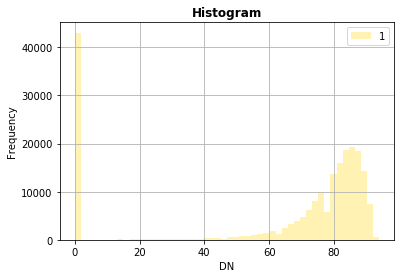

In [14]:
from rasterio.plot import show_hist
show_hist(delaware_array, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [15]:
delaware_array.shape

(594, 351)

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl

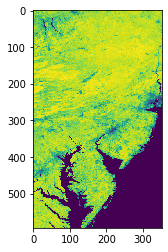

In [17]:
plt.imshow(delaware_array);  # Visualize a basic plot of the scaled EVI data

In [18]:
vmin = delaware_array.min()

In [19]:
vmax = delaware_array.max()

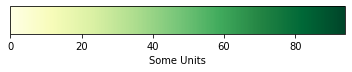

In [20]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.YlGn
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

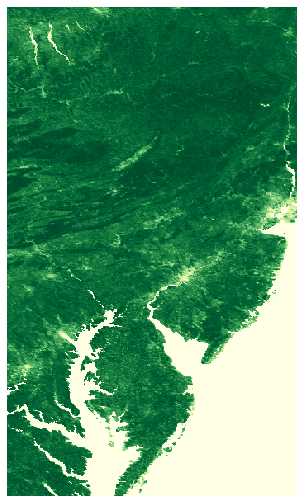

In [21]:
EVIDisplay=delaware_array
plt.figure(figsize = (8,9))    # Set the figure size (x,y)
plt.axis('off')                   # Remove the axes' values

# Plot the array, using a colormap and setting a custom linear stretch based on the min/max EVI values
plt.imshow(EVIDisplay, vmin = np.nanmin(EVIDisplay), vmax = np.nanmax(EVIDisplay), cmap = 'YlGn');